<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.287244,62.946350,799.474436,911.708031,247.553138,664.154892
1,0.0,1.0,57.699009,48.164059,1583.076205,1698.939272,86.025844,1612.913428
2,0.0,2.0,44.669595,28.713167,-239.284622,-155.901860,587.359322,-743.261182
3,0.0,3.0,64.210181,58.879910,709.507414,842.597506,-177.387922,1019.985428
4,0.0,4.0,25.745559,84.356823,-892.311454,-772.209072,230.002059,-1002.211131
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.749866,78.565355,4371.364434,4549.679654,1055.998383,3493.681271
119996,999.0,116.0,66.013287,23.163761,-288.313513,-189.136465,-99.652712,-89.483753
119997,999.0,117.0,43.455359,92.429670,-2741.575514,-2595.690485,1229.596925,-3825.287410
119998,999.0,118.0,50.653756,73.036145,1455.654923,1589.344825,859.377953,729.966872


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat  
rep   index               
0.0   0.0     664.154892  
      1.0    1612.913428  
      2.0    -743.261182  
      3.0    1019.985428  
      4.0   -1002.211131  
...                  ...  
999.0 115.0  3493.681271  
      116.0   -89.483753  
      117.0 -3825.287410  
      118.0   729.966872  
      119.0   458.720763  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat  
rep   index               
0.0   0.0     664.154892  
      1.0    1612.913428  
      2.0    -743.261182  
      3.0    1019.985428  
      4.0   -1002.211131  
...                  ...  
999.0 115.0  3493.681271  
      116.0   -89.483753  
      117.0 -3825.287410  
      118.0   729.966872  
      119.0   458.720763  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.287244,62.946350,799.474436,911.708031,247.553138,664.154892
1,0.0,1.0,57.699009,48.164059,1583.076205,1698.939272,86.025844,1612.913428
2,0.0,2.0,44.669595,28.713167,-239.284622,-155.901860,587.359322,-743.261182
3,0.0,3.0,64.210181,58.879910,709.507414,842.597506,-177.387922,1019.985428
4,0.0,4.0,25.745559,84.356823,-892.311454,-772.209072,230.002059,-1002.211131
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.749866,78.565355,4371.364434,4549.679654,1055.998383,3493.681271
119996,999.0,116.0,66.013287,23.163761,-288.313513,-189.136465,-99.652712,-89.483753
119997,999.0,117.0,43.455359,92.429670,-2741.575514,-2595.690485,1229.596925,-3825.287410
119998,999.0,118.0,50.653756,73.036145,1455.654923,1589.344825,859.377953,729.966872


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat  
rep   index               
0.0   0.0     664.154892  
      1.0    1612.913428  
      2.0    -743.261182  
      3.0    1019.985428  
      4.0   -1002.211131  
...                  ...  
999.0 115.0  3493.681271  
      116.0   -89.483753  
      117.0 -3825.287410  
      118.0   729.966872  
      119.0   458.720763  

[120000 rows x 6 columns]

In [12]:
tables = table.assign(e2=lambda x: x.e ** 2)
tables

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat            e2  
rep   index                             
0.0   0.0     664.154892  6.391594e+05  
      1.0    1612.913428  2.506130e+06  
      2.0    -743.261182  5.725713e+04  
      3.0    1019.985428  5.034008e+05  
      4.0   -1002.211131  7.962197e+05  
...                  ...           ...  
999.0 115.0  3493.681271  1.910883e+07  
      116.0   -89.483753  8.312468e+04  
      117.0 -3825.287410  7.516236e+06  
      118.0   729.966872  2.118931e+06  
      119.0   458.720763  5.373947e+04  

[120000 rows x 7 columns]

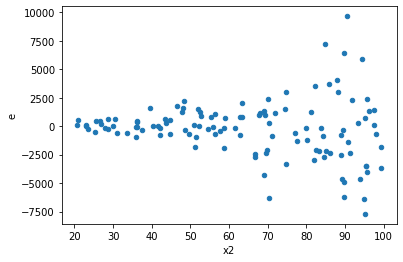

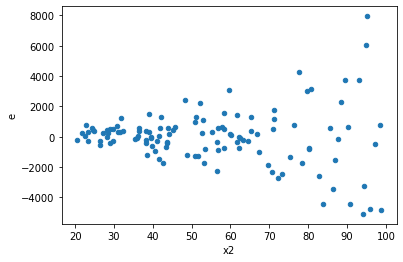

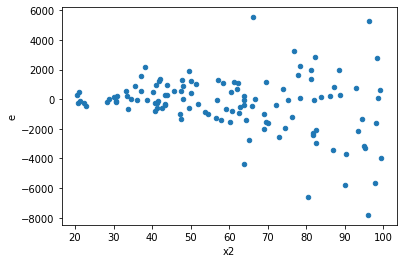

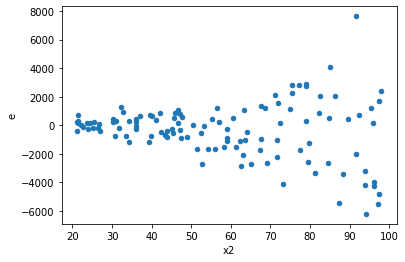

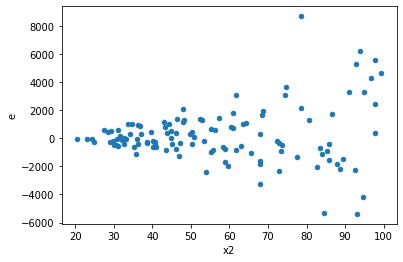

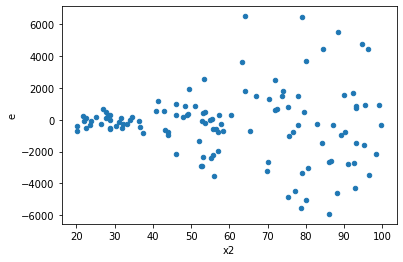

In [19]:
tablenew0 = tables.loc[0.0]
tablenew1 = tables.loc[1.0]
tablenew2 = tables.loc[2.0]
tablenew3 = tables.loc[3.0]
tablenew4 = tables.loc[4.0]
tablenew5 = tables.loc[5.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,59.0,57.0,125800156.23965319,280725737.5240178,2132206.0379602234,4925012.9390178565,2.30982036976566,0.0018051280173585482,0.9990974359913207,0.0009025640086792741,Reject001=0 : Heteroscedasticity
6.0,57.0,59.0,63669593.90426538,469616292.15325606,1117010.4193730769,7959598.172089086,7.1258047678341425,2.83728596173205e-12,0.9999999999985814,1.418642980866025e-12,Reject001=0 : Heteroscedasticity
7.0,56.0,60.0,66094261.93465884,386323818.59943396,1180254.677404622,6438730.309990566,5.455373686083856,7.649805233711504e-10,0.9999999996175097,3.824902616855752e-10,Reject001=0 : Heteroscedasticity
11.0,53.0,63.0,166160878.88791126,276369040.37832224,3135110.92241342,4386810.164735273,1.3992519796901766,0.2006489501324764,0.8996755249337618,0.1003244750662382,Reject001=1 : Homoscedasticity
12.0,69.0,47.0,336664688.3040377,236636267.6046867,4879198.381217938,5034814.204355036,1.0318937274073807,0.9205048794568373,0.5397475602715813,0.46025243972841867,Reject001=1 : Homoscedasticity
13.0,63.0,53.0,93339302.48011193,353069573.8485176,1481576.2298430465,6661690.072613539,4.496353234095324,9.665510303236147e-08,0.9999999516724485,4.8327551516180733e-08,Reject001=0 : Heteroscedasticity
18.0,46.0,70.0,37284778.303267844,484826646.9434698,810538.6587666923,6926094.956335283,8.545051961955721,3.9968028886505635e-15,0.999999999999998,1.9984014443252818e-15,Reject001=0 : Heteroscedasticity
23.0,61.0,55.0,168605595.22034875,245109085.02563757,2764026.151153258,4456528.818647956,1.612332364072793,0.07370320374927086,0.9631483981253646,0.03685160187463543,Reject001=1 : Homoscedasticity
24.0,57.0,59.0,242488710.1396373,268905799.7125028,4254187.897186619,4557725.418855979,1.0713502856491355,0.7926967835939804,0.6036516082030098,0.3963483917969902,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,61.0,55.0,501270415.58182174,190935897.3114408,8217547.796423308,3471561.7692989237,0.42245714357875996,0.0011866343246334063,Reject001=0 : Heteroscedasticity
1.0,59.0,57.0,125800156.23965319,280725737.5240178,2132206.0379602234,4925012.9390178565,2.30982036976566,0.0018051280173585482,Reject001=0 : Heteroscedasticity
2.0,61.0,55.0,381211296.58215,36494423.33636202,6249365.517740164,663534.9697520367,0.10617637388442883,2.3787686417966674e-15,Reject001=0 : Heteroscedasticity
3.0,56.0,60.0,406613347.6168741,32190823.289857123,7260952.636015609,536513.7214976187,0.07389026597369824,2.1854556107637095e-18,Reject001=0 : Heteroscedasticity
4.0,45.0,71.0,397282086.33491945,48316729.45028103,8828490.807442654,680517.3162011413,0.07708195330819703,1.952686908514002e-15,Reject001=0 : Heteroscedasticity
5.0,58.0,58.0,402827366.7779373,163001484.99062327,6945299.427205815,2810370.4308728147,0.4046435233395637,0.0007390809415389623,Reject001=0 : Heteroscedasticity
6.0,57.0,59.0,63669593.90426538,469616292.15325606,1117010.4193730769,7959598.172089086,7.1258047678341425,2.83728596173205e-12,Reject001=0 : Heteroscedasticity
7.0,56.0,60.0,66094261.93465884,386323818.59943396,1180254.677404622,6438730.309990566,5.455373686083856,7.649805233711504e-10,Reject001=0 : Heteroscedasticity
8.0,67.0,49.0,413082198.9677904,100817723.77452327,6165405.95474314,2057504.5668270055,0.3337176143679778,3.4790269894476204e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    687
Reject001=1 : Homoscedasticity      313
Name: Result_test, dtype: int64